### GEOPHYSICS TUTORIAL 2018

# Log prediction using Machine Learning

### by Sundeep Sharma, Devon Energy, sharmasundeep89@gmail.com

In [8]:
import numpy as np
import pandas as pd

### Introduction
Sonic logs (DT) are an integral part of any geophysics workflow. They are used to tie time migrated seismic section to wells for depth conversion as well as an input to create an initial acoustic impedance model for model based inversions. Unfortunately, there are times where an area of interest may have missing sonic logs due to lack of acquisition or tool failures. However, logs such as gamma ray (GR) and neutron porosity (NPHI) are usually available if a well was logged in the interval of interest. In this tutorial, we will go through a very simple and effective **_machine learning_** technique, **_multiple linear regression_**, to predict DT logs using GR and NPHI logs.

### Multiple Linear Regression

Let $x^{(i)}$ denote the input variables or features (GR and NPHI) and $y^{(i)}$ represent our target variable or feature we are trying to predict (DT). Here $"(i)"$  represents the number of datapoints (indexes) of our dataset. For our dataset, we are using two features, GR and NPHI, to predict the target DT. We can represent our hypothesis as follows: 

### $ h_{\theta}(x)=\theta_{0} + \theta_{1}x_{1}+ \theta_{2}x_{2}$

where $ h_{\theta}(x)$ is the predicted value of the dependent variable (DT), $x_{1}$ and $x_{2}$ are independent variables (GR and NPHI), $\theta_{0}$ is the value of $h_{\theta}(x)$ when all the indepdent variables ($x_{1}$ and $x_{2}$ here) are equal to zero. $\theta_{1}$ and $\theta_{2}$ are estimated linear regression coefficients.

The goal is to choose parameters $\theta_{0}$, $\theta_{1}$ and $\theta_{2}$ such that the $ h_{\theta}(x)$  is close to _y_ for our training example. We can define a cost function ($J(\Theta)$) which will minimize the parameters ($\theta_{0},\theta_{1},\theta_{2}$) of our dataset as follows:

### $ \underset{\theta_{0},\theta_{1},\theta_{2}}{\text{minimize}}\: J(\Theta)=\frac{1}{2m}\sum\limits_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})^{2} $ 

For better intuition, consider a simple scatter plot whose points are in the x-y plane and a linear fit line that goes through these points has a slope of 1 and  passes through the origin. The cost function J($\Theta$) will be minimized when $\theta_{0}$ and $\theta_{1}$ are equal to 0 and 1, respectively.

We can minimize $J_{\Theta}$ through trial and error, trying a lots of random values and visually looking at the resultant graph. However, this can be quite tedious when we add more features to our linear regression problem. One way to minimize the cost function is by using Gradient Descent Method. Gradient descent method starts with an initial estimate of our parameters ($\Theta$) and updates them iteratively until we reach a minimum value for the cost function. The algorithm is as follows: 

### $ Repeat \: \{ \\
\theta_{j} := \theta_{j} - \alpha\frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)} \\ (simultaneously \: update \: \theta_{j} \: for \: \it{j=0,1...n}) \\ \} $


Where $m$ is the number of training examples, $n$ is the number of features, $x^{(i)}$ is the input (features) for the $i^{th}$ training example, $x_{j}^{(i)}$ is the value of feature $j$ in the $i^{th}$ training example and $\alpha$ is the learning rate. The learning rate, $\alpha$, determines how fast or slow we converge towards the optimal weights ,$\Theta$. Larger $\alpha$ will result in very large steps which could possible overshoot and skip the optimal solution. On the other hand, smaller $\alpha$ requires lot of iterations to converge to the optimal solution. Therefore, choosing the correct value of $\alpha$ is crucial. For log dataset, we can test out various $\alpha$ values and choose the one that provides the optimal weights.

### DT Prediction Example 

In this section, we will go through an example of DT prediction using two logs from the Teapot dome 3D survey. First, we will load the CSV dataset using pandas library. 

In [58]:
data= pd.read_csv('dt_prediction_dataset.csv')
data.head()

,Depth,DT,GR,NPHI,UWI,Well Label
0,2080.0,90.296,121.93,0.2731,49025109370000,53-LX-3
1,2080.5,89.769,136.02,0.2631,49025109370000,53-LX-3
2,2081.0,89.013,140.85,0.2528,49025109370000,53-LX-3
3,2081.5,88.410,142.35,0.2425,49025109370000,53-LX-3
4,2082.0,88.109,141.41,0.2329,49025109370000,53-LX-3


In [59]:
training_data = data[data['Well Label'] == '53-LX-3']
blind_data=data[data['Well Label'] != '53-LX-3'].reset_index(drop=True) # Reset the index and drop the index column that
#is created by default

### NOT FOR MANUSCRIPT

In [60]:
training_data.head()

,Depth,DT,GR,NPHI,UWI,Well Label
0,2080.0,90.296,121.93,0.2731,49025109370000,53-LX-3
1,2080.5,89.769,136.02,0.2631,49025109370000,53-LX-3
2,2081.0,89.013,140.85,0.2528,49025109370000,53-LX-3
3,2081.5,88.410,142.35,0.2425,49025109370000,53-LX-3
4,2082.0,88.109,141.41,0.2329,49025109370000,53-LX-3


In [61]:
blind_data.head()

,Depth,DT,GR,NPHI,UWI,Well Label
0,2088.0,91.578,94.849,0.233,49025109650000,88-AX-28
1,2088.5,91.578,91.132,0.233,49025109650000,88-AX-28
2,2089.0,91.578,87.114,0.238,49025109650000,88-AX-28
3,2089.5,91.578,85.320,0.237,49025109650000,88-AX-28
4,2090.0,91.578,84.879,0.235,49025109650000,88-AX-28


Firstly, let us visually analyze what are the relationships between our variables. For this tutorial,we are only using GR and NPHI, but analyzing relationships between your features and outputs should be done extensively. 

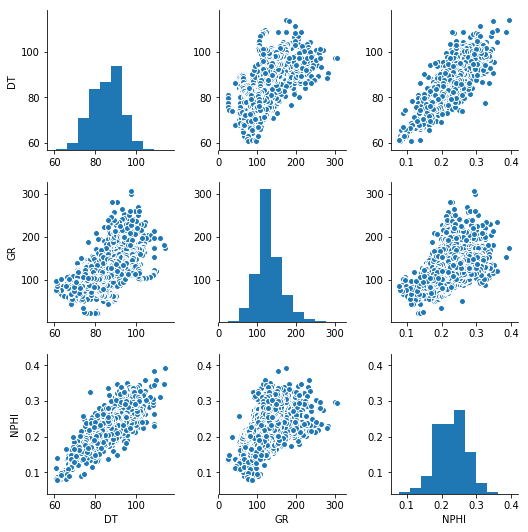

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(training_data[['DT','GR','NPHI']])
plt.show()

We can see from the pairpot that DT is linearly correlated with both GR and NPHI. This is a good indication and we can confidently march forward with our multiple linear regression prediction.

### Feature Scaling

Feature scaling, also known as normalization, is an important step for multiple linear regression method with gradient descent algorithm. This process is done to ensure standardized  input features. The idea is to make sure the input features are on a similar scale, which ensures a symmetric error space and can improve the convergence speed of our gradient descent algorithm. For our example, we will subtract each feature by its mean and divide it by its standard deviation.

## $x'=\frac{x - mean(x)}{std(x)}$

Firstly, we will have to create a matrix X that contains our feature dataset. We will add a column of ones for our parameter $\theta_{0}$. 

In [63]:
m=len(training_data) # m is the number of training examples

In [64]:
X = training_data[['GR','NPHI']]

In [65]:
def featureNormalize(X):
    X_norm=X
    mu=np.mean(X)
    sigma=np.std(X)
    X=(X-mu)/sigma
    X_norm=X
    return X_norm,mu,sigma

X_norm,mu,sigma=featureNormalize(X)

X_train=X_norm

X_train.insert(loc=0,column='Ones',value=1)

X_train.tail()

,Ones,GR,NPHI
4011,1,-0.863738,-0.567503
4012,1,-0.836036,-0.617100
4013,1,-0.817770,-0.919406
4014,1,-0.789154,-1.342163
4015,1,-0.771802,-1.420101


In [66]:
mu

GR      130.562757
NPHI      0.228329
dtype: float64

### Cost Function and Gradient Descent Algorithm

In [67]:
def computeCostMulti(X,y,theta):
    m=len(y);
    predictions=np.dot(X,theta)
    sqerrors=np.power(predictions-y,2)
    J=(1./(2*m))*np.sum(sqerrors)
    return J

def gradientDescent(X, y, theta, alpha, num_iters):

    #GRADIENTDESCENT Performs gradient descent to learn theta
    #   theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    #   taking num_iters gradient steps with learning rate alpha

    # Initialize some values
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))

    for i in xrange(num_iters):
        a=np.matmul(np.transpose(X),X)
        b= np.dot(np.transpose(X),y)
        delta=(1./m)*(np.dot(a,theta)-b)
        theta=theta-np.dot(alpha,delta)
        
        J_history[i] =  computeCostMulti(X, y, theta)

    return theta,J_history

Initialize $\Theta$ for the gradient descent algorithm. For our purposes, we will just initiate theta as all zeroes. For more complex optimization problems, getting a good starting model or values are required to ensure that the algorithm finds the global minumim in the error space. 

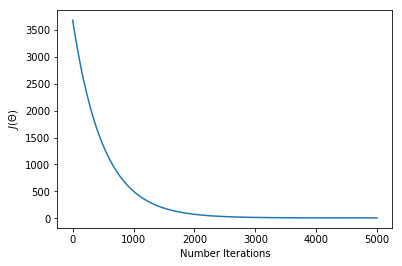

In [68]:
m,n= X_train.shape
init_theta=np.zeros((n,1))
init_theta
y=training_data[['DT']] # Output to be predicted 
alpha=0.001 # Learning rate
num_iters=5000 #Number of gradient descent iterations

theta,J_history=gradientDescent(X_train,y,init_theta,alpha,num_iters)

plt.plot(J_history)
plt.xlabel('Number Iterations')
plt.ylabel('$J(\Theta)$')
plt.show()


To make sure gradient descent is working correctly, we can plot cost function history vs. number of iterations. If everything is working properly, $J(\Theta)$ should decrease with every iteration. If $J(\Theta)$ is increasing, please check that the learning rate isn't set too high.

Now that we have the weights, we can use those weights to predict the blind well DT using GR and NPHI. First, we will have to add a column of ones and scale the GR and NPHI the same as the traning dataset. We can use the vectors $mu$ and $sigma$ calculated when scaling the training dataset. 

In [69]:
blind_data.head()

,Depth,DT,GR,NPHI,UWI,Well Label
0,2088.0,91.578,94.849,0.233,49025109650000,88-AX-28
1,2088.5,91.578,91.132,0.233,49025109650000,88-AX-28
2,2089.0,91.578,87.114,0.238,49025109650000,88-AX-28
3,2089.5,91.578,85.320,0.237,49025109650000,88-AX-28
4,2090.0,91.578,84.879,0.235,49025109650000,88-AX-28


In [70]:
X_temp=blind_data[['GR','NPHI']]
X_blind=X_temp.copy()

In [71]:
X_blind['GR']=(X_blind["GR"]-mu['GR'])/sigma["GR"]
X_blind['NPHI']=(X_blind["NPHI"]-mu['NPHI'])/sigma["NPHI"]

In [72]:
X_blind.insert(loc=0,column='Ones',value=1)


In [73]:
X_blind.head()

,Ones,GR,NPHI
0,1,-1.087217,0.110325
1,1,-1.200372,0.110325
2,1,-1.322690,0.228413
3,1,-1.377304,0.204796
4,1,-1.390729,0.157560


### Predict DT using calculate weights 

In [74]:
y_pred=np.dot(X_blind.values,theta)

y_blind=blind_data["DT"]

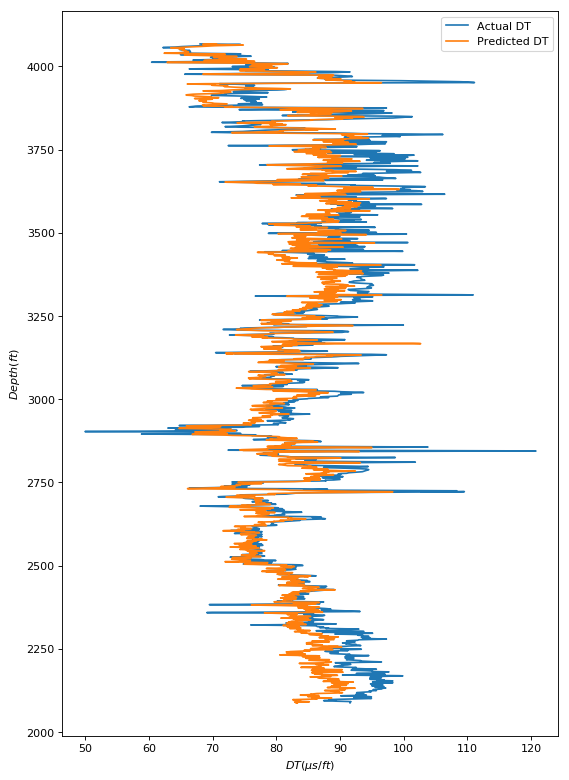

In [75]:
plt.figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_blind,blind_data["Depth"],y_pred,blind_data["Depth"])
plt.xlabel('$DT(\mu s/ft)$')
plt.ylabel('$Depth(ft)$')
plt.legend(['Actual DT','Predicted DT'])
plt.show()

You can see that our predicted DT matches the real DT very well. There are some areas where the match isn't stellar. What we can try now is to scale the data indepdenent of the training dataset $mu$ and $sigma$. It turns out, the weights calculated using the training dataset and self scaling of the blind dataset results in a better prediction. 

In [76]:
X_blind=blind_data[['GR','NPHI']]
X_norm2,mu2,sigma2=featureNormalize(X_blind)
X_norm2.head()


,GR,NPHI
0,-0.647548,0.481020
1,-0.764183,0.481020
2,-0.890264,0.612116
3,-0.946557,0.585897
4,-0.960395,0.533458


In [77]:
X_blind2=X_norm2

X_blind2.insert(loc=0,column='Ones',value=1)

X_blind2.head()

,Ones,GR,NPHI
0,1,-0.647548,0.481020
1,1,-0.764183,0.481020
2,1,-0.890264,0.612116
3,1,-0.946557,0.585897
4,1,-0.960395,0.533458


In [78]:
y_pred2=np.dot(X_blind2.values,theta)

y_blind=blind_data["DT"]

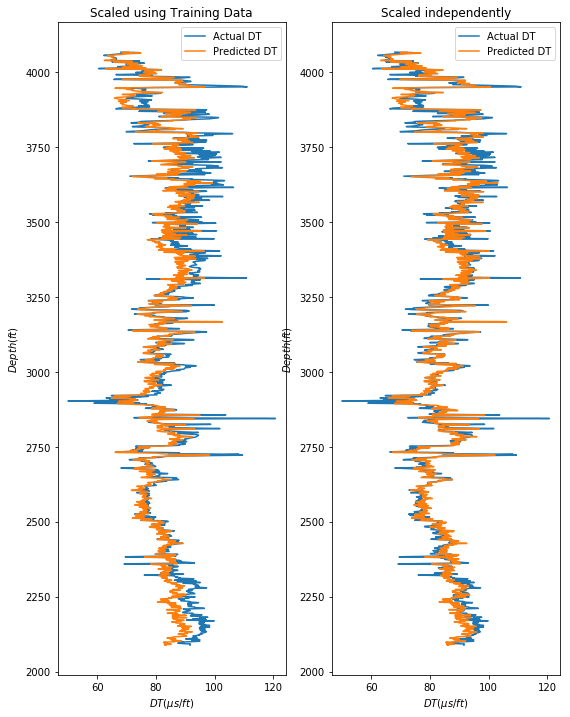

In [79]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 12))
ax[0].plot(y_blind,blind_data["Depth"],y_pred,blind_data["Depth"])
ax[0].set_xlabel('$DT(\mu s/ft)$')
ax[0].set_ylabel('$Depth(ft)$')
ax[0].legend(['Actual DT','Predicted DT'])
ax[0].set_title('Scaled using Training Data')


ax[1].plot(y_blind,blind_data["Depth"],y_pred2,blind_data["Depth"])
ax[1].set_xlabel('$DT(\mu s/ft)$')
ax[1].set_ylabel('$Depth(ft)$')
ax[1].legend(['Actual DT','Predicted DT'])
ax[1].set_title('Scaled independently')

plt.show()

### NORMAL EQUATION METHOD 

Now that we have discussed numerical solution to find the regression coefficients, I want to introduce an analytical solution to obtain them. The regression coefficients can be obtained analytically by using Normal Equation, also known as the Ordinary Least Squares (OLS) method. For this method, we don’t have to iterate or set a learning rate, α, neither do we have to scale the features. We solve the linear system of the following form:

$ \theta=(X^{T}X)^{-1}X^{T}y$

where $(X^{T}X)^{-1}$ is the inverse of the matrix (X^{T}X) and $y$ is the desired output.  This method gives a very similar result to the numerical solution obtained using Gradient Descent method. However, there are few things to take into account while using Normal Equation method for linear systems. Firstly, the matrix multiplication $(X^{T}X)$ is of cubic time complexity $(O(n^{3}))$. This method will take incredibly long to compute the solution for dataset with more than 10k features. Secondly, we have to consider the invertability of the matrix $(X^{T}X)$ if the matrix is singular or degenerate. For many cases, we can ensure invertability by using pseudoinverse function (pinv) in numpy’s linear algebra (linalg) module.

In [80]:
def normalEqn(X,y):
    t1=np.linalg.pinv(np.dot(np.transpose(X),X))
    t2=np.dot(np.transpose(X),y)
    theta=np.dot(t1,t2)
    return theta

In [81]:
X = training_data[['GR','NPHI']]
y=training_data[['DT']]
X_train=X.copy()
X_train.insert(loc=0,column='Ones',value=1)

In [82]:
theta=normalEqn(X_train,y)

In [83]:
X_blind=blind_data[['GR','NPHI']]
y_blind=blind_data[['DT']]
X_blind.insert(loc=0,column='Ones',value=1)

In [84]:
y_pred_an=np.dot(X_blind,theta)

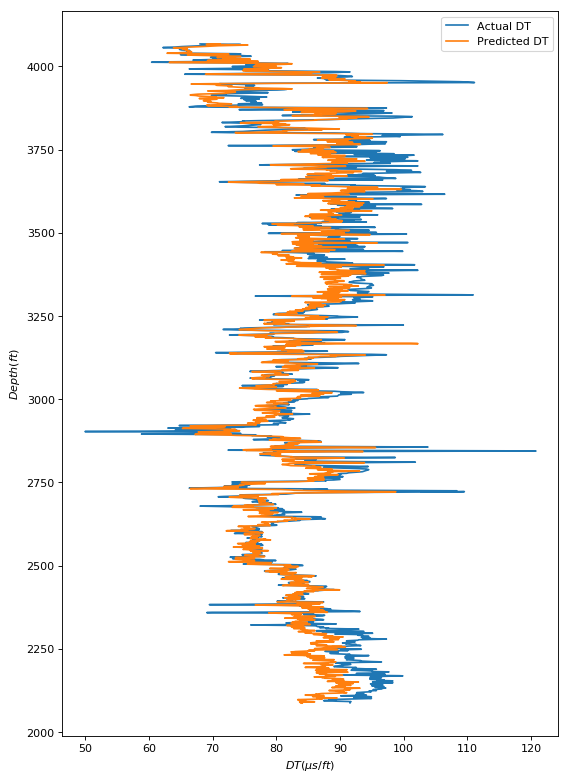

In [85]:
plt.figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_blind,blind_data["Depth"],y_pred_an,blind_data["Depth"])
plt.xlabel('$DT(\mu s/ft)$')
plt.ylabel('$Depth(ft)$')
plt.legend(['Actual DT','Predicted DT'])
plt.show()